<a href="https://colab.research.google.com/github/joeljacson/machine-learning/blob/main/PH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()


Saving kaggle (16).json to kaggle (16).json


{'kaggle (16).json': b'{"username":"joeljacsonjamesgopi","key":"64fad9082ff439d5f3903bddad325d62"}'}

In [4]:
import os

# Check if the kaggle.json file is in the current directory
if 'kaggle.json' not in os.listdir():
    print("Please make sure you have uploaded the kaggle.json file.")
else:
    # Set up Kaggle API token
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json


Please make sure you have uploaded the kaggle.json file.


In [5]:
!kaggle datasets download -d tusharpaul2001/crop-water-management-and-quality

Dataset URL: https://www.kaggle.com/datasets/tusharpaul2001/crop-water-management-and-quality
License(s): apache-2.0
  0% 0.00/164k [00:00<?, ?B/s]
100% 164k/164k [00:00<00:00, 76.1MB/s]


In [6]:
import zipfile

with zipfile.ZipFile('crop-water-management-and-quality.zip', 'r') as zip_ref:
    zip_ref.extractall('crop_water_management')


In [9]:
import zipfile

with zipfile.ZipFile('crop-water-management-and-quality.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
    zip_ref.close()


In [10]:
import numpy as np
import pandas as pd


In [11]:
df=pd.read_csv('/content/water_quality.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/water_quality.csv')

# Display the first few rows of the dataset
print(df.head())


         ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [13]:
# Display basic information about the dataset
print(df.info())

# Display statistical summary
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085 

In [16]:
# Display the columns in the DataFrame
print(df.columns)



Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [17]:
# Define the features and target variable
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
             'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'

# Extract features and target from the DataFrame
X = df[features]
y = df[target]


In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Check for missing values in the dataset
print(df.isnull().sum())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [21]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Re-define features and target after dropping missing values
X = df_cleaned[features]
y = df_cleaned[target]


In [22]:
from sklearn.impute import SimpleImputer

# Define the imputer for numerical features
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the DataFrame
df[features] = imputer.fit_transform(df[features])

# Verify that there are no missing values left
print(df.isnull().sum())


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Re-define features and target after handling missing values
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[412   0]
 [244   0]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.impute import SimpleImputer

# Define the imputer for numerical features
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the DataFrame
df[features] = imputer.fit_transform(df[features])

# Verify that there are no missing values left
print(df.isnull().sum())


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [25]:
# Define the features and target variable
features = ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
             'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'ph'

# Extract features and target from the DataFrame
X = df[features]
y = df[target]


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 2.200220639253078
R^2 Score: 0.02000638673739985


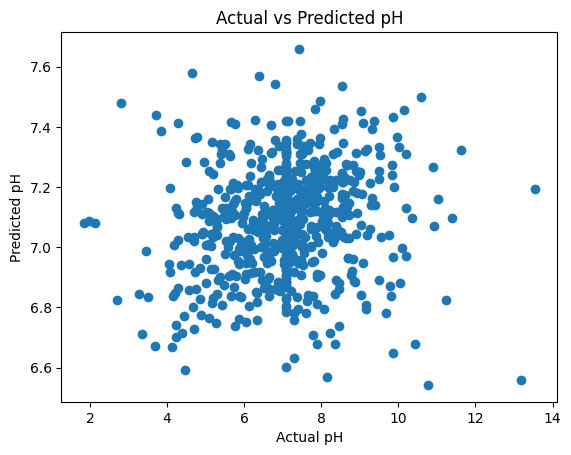

In [28]:
import matplotlib.pyplot as plt

# Plot predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual pH')
plt.ylabel('Predicted pH')
plt.title('Actual vs Predicted pH')
plt.show()


In [29]:
import pandas as pd

# Create a DataFrame for actual vs predicted values
results_df = pd.DataFrame({
    'Actual pH': y_test,
    'Predicted pH': y_pred
}).reset_index(drop=True)

# Display the first few rows of the results DataFrame
print(results_df.head())


   Actual pH  Predicted pH
0   7.080795      7.072061
1   6.643159      6.899855
2   7.846058      7.276728
3   7.160467      7.197098
4   6.615350      6.866255


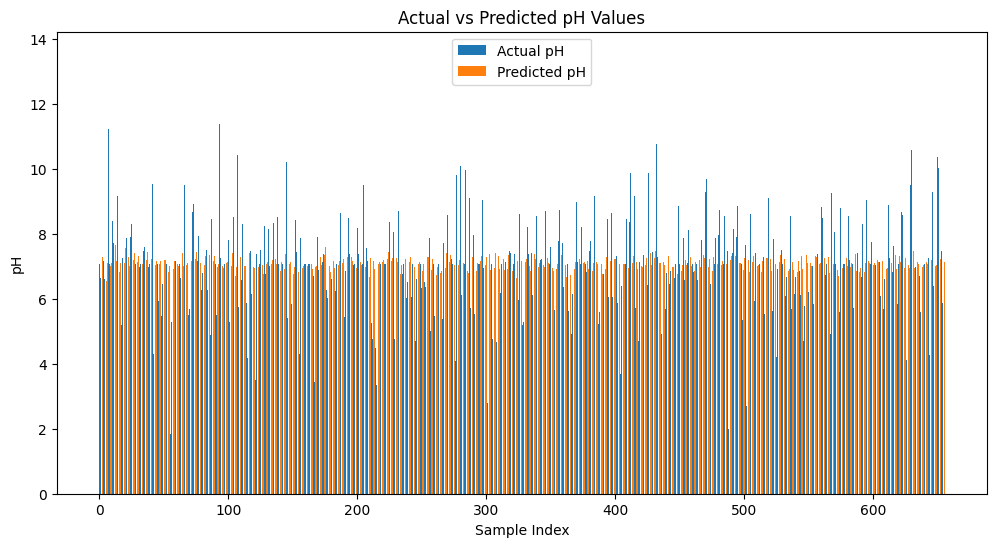

In [30]:
import matplotlib.pyplot as plt

# Set the index for the x-axis
indices = range(len(results_df))

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(indices, results_df['Actual pH'], width=0.4, label='Actual pH', align='center')
plt.bar([i + 0.4 for i in indices], results_df['Predicted pH'], width=0.4, label='Predicted pH', align='center')

plt.xlabel('Sample Index')
plt.ylabel('pH')
plt.title('Actual vs Predicted pH Values')
plt.legend()
plt.show()


In [31]:
import numpy as np

# Define bins for categorizing pH values
bins = [0, 4, 6, 8, 10]  # Define the bins as per your data range
labels = ['<4', '4-6', '6-8', '8-10']  # Define the labels for each bin

# Bin the actual and predicted pH values
actual_counts, _ = np.histogram(results_df['Actual pH'], bins=bins)
predicted_counts, _ = np.histogram(results_df['Predicted pH'], bins=bins)

# Prepare data for pie charts
actual_data = dict(zip(labels, actual_counts))
predicted_data = dict(zip(labels, predicted_counts))


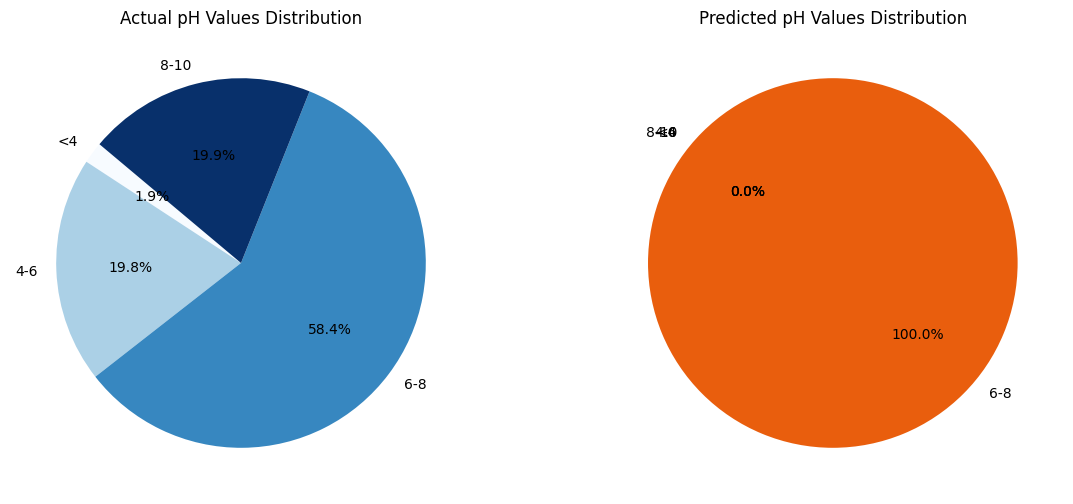

In [32]:
# Plot pie chart for actual pH values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(actual_data.values(), labels=actual_data.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Blues(np.linspace(0, 1, len(actual_data))))
plt.title('Actual pH Values Distribution')

# Plot pie chart for predicted pH values
plt.subplot(1, 2, 2)
plt.pie(predicted_data.values(), labels=predicted_data.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Oranges(np.linspace(0, 1, len(predicted_data))))
plt.title('Predicted pH Values Distribution')

plt.show()


#. Decision Trees

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a Decision Tree Regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 4.172371257071007
R^2 Score: -0.858403248811499


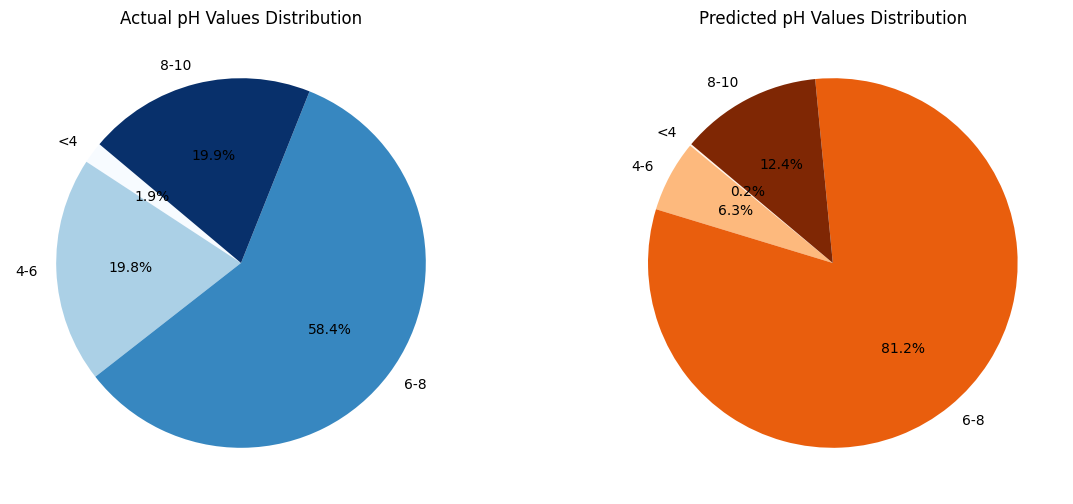

In [41]:
import matplotlib.pyplot as plt

# Plot pie chart for actual pH values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(actual_data.values(), labels=actual_data.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Blues(np.linspace(0, 1, len(actual_data))))
plt.title('Actual pH Values Distribution')

# Plot pie chart for predicted pH values
plt.subplot(1, 2, 2)
plt.pie(predicted_data.values(), labels=predicted_data.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Oranges(np.linspace(0, 1, len(predicted_data))))
plt.title('Predicted pH Values Distribution')

plt.show()


Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 2.236988844962453
R^2 Score: 0.003629571556470923


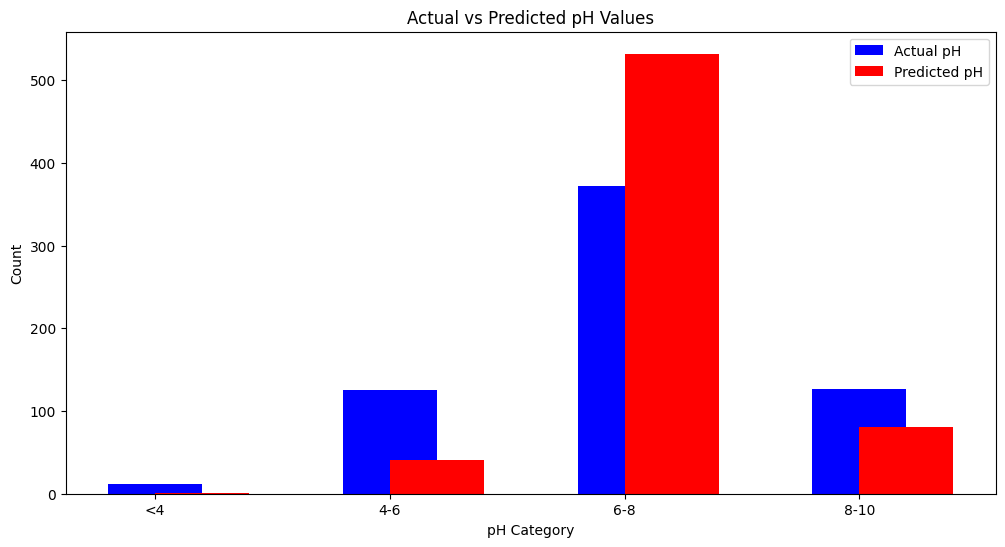

In [42]:
import matplotlib.pyplot as plt

# Plot bar chart for actual vs predicted pH values
plt.figure(figsize=(12, 6))

# Plot bars for actual pH values
plt.bar(results_df['Category'], results_df['Actual pH'], width=0.4, label='Actual pH', align='center', color='b')

# Plot bars for predicted pH values
plt.bar(results_df['Category'], results_df['Predicted pH'], width=0.4, label='Predicted pH', align='edge', color='r')

plt.xlabel('pH Category')
plt.ylabel('Count')
plt.title('Actual vs Predicted pH Values')
plt.legend()
plt.show()


#Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 2.1750548938030803
R^2 Score: 0.031215385223280046


#4. Support Vector Regressor


In [36]:
from sklearn.svm import SVR

# Train a Support Vector Regressor
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 2.2371573651106926
R^2 Score: 0.003554511507476432


#Neural Networks

In [37]:
from keras.models import Sequential
from keras.layers import Dense

# Build a Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 165726.8594
Epoch 2/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 161.8768
Epoch 3/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 104.5852
Epoch 4/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 90.1219
Epoch 5/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 79.4241
Epoch 6/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 58.9057
Epoch 7/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 76.0063
Epoch 8/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45.2298
Epoch 9/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.2009
Epoch 10/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47.3716
Epoch 11/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 661.4712
Epoch 12/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 29.6993
Epoch 13/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 68.7537
Epoch 14/100
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 234.6237
Epoch 15/100
262/262 ━━━━━━━━━━━━

#XGBoost
XGBoost is another powerful algorithm for regression tasks.

In [38]:
import xgboost as xgb

# Train an XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 2.788970928378053
R^2 Score: -0.24222709696669464


In [46]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/water_quality.csv')

# Print column names to verify
print(df.columns)


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [49]:
# Check for missing values in the dataset
print(df.isnull().sum())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [50]:
from sklearn.impute import SimpleImputer

# Create an imputer object to replace NaN values with the median
imputer = SimpleImputer(strategy='median')

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model with imputed data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 0.20859893292682924
R^2 Score: 0.10703853254814599


In [51]:
# Drop rows with missing values
df_clean = df.dropna()

# Prepare data again
X = df_clean[features]
y = df_clean[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with clean data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


Mean Squared Error: 0.20942729528535983
R^2 Score: 0.14394247457968345


Column names: Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')
Missing values before imputation:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Mean Squared Error: 0.20831417682926828
R^2 Score: 0.10825750437689008


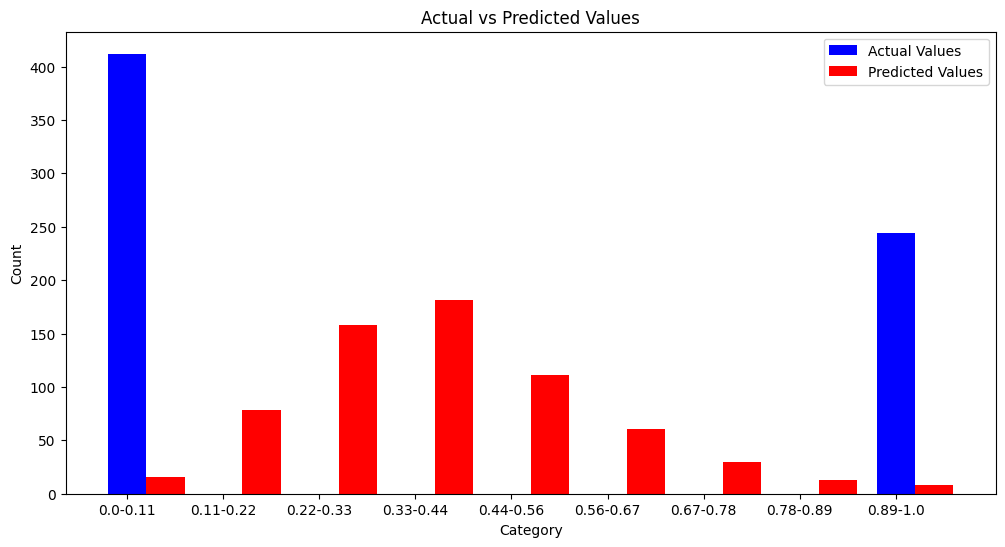

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv('/content/water_quality.csv')

# Print column names to verify
print("Column names:", df.columns)

# Define features and target variable
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'  # Replace with the actual target column if different

# Prepare data
X = df[features]
y = df[target]

# Check for missing values
print("Missing values before imputation:\n", df.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Prepare data for visualization
bins = np.linspace(y.min(), y.max(), 10)  # Define bins based on your target variable's range
labels = [f'{round(bins[i], 2)}-{round(bins[i + 1], 2)}' for i in range(len(bins) - 1)]

# Bin the actual and predicted values
actual_counts, _ = np.histogram(y_test, bins=bins)
predicted_counts, _ = np.histogram(y_pred, bins=bins)

# Prepare DataFrame for bar chart
results_df = pd.DataFrame({
    'Category': labels,
    'Actual Values': actual_counts,
    'Predicted Values': predicted_counts
})

# Plot bar chart for actual vs predicted values
plt.figure(figsize=(12, 6))

# Plot bars for actual values
plt.bar(results_df['Category'], results_df['Actual Values'], width=0.4, label='Actual Values', align='center', color='b')

# Plot bars for predicted values
plt.bar([i + 0.4 for i in range(len(results_df))], results_df['Predicted Values'], width=0.4, label='Predicted Values', align='center', color='r')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


Mean Squared Error: 0.20831417682926828
R^2 Score: 0.10825750437689008


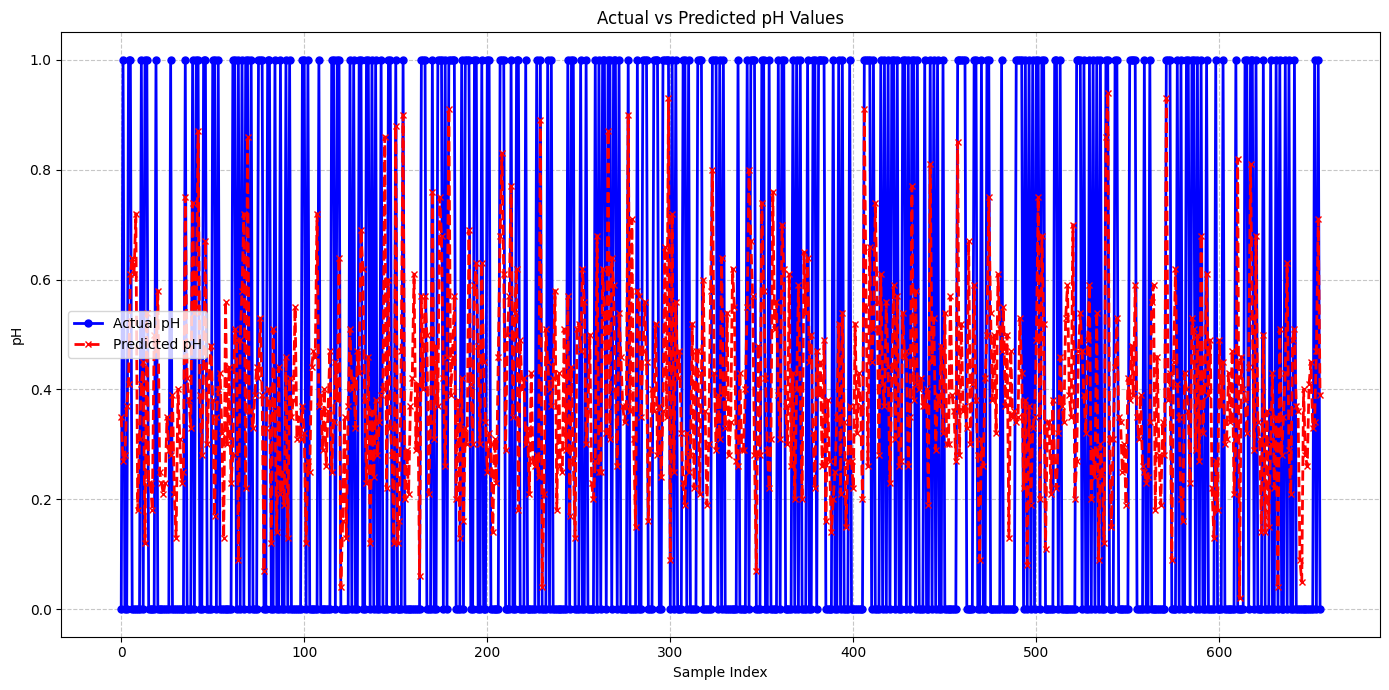

In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv('/content/water_quality.csv')

# Define features and target variable
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'  # Adjust this if needed

# Prepare data
X = df[features]
y = df[target]

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Plot line graph
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(np.arange(len(y_test)), y_test.values, label='Actual pH', color='b', marker='o', linestyle='-', linewidth=2, markersize=5)

# Plot predicted values
plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted pH', color='r', linestyle='--', marker='x', linewidth=2, markersize=5)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('pH')
plt.title('Actual vs Predicted pH Values')
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()


Mean Squared Error: 0.20831417682926828
R^2 Score: 0.10825750437689008


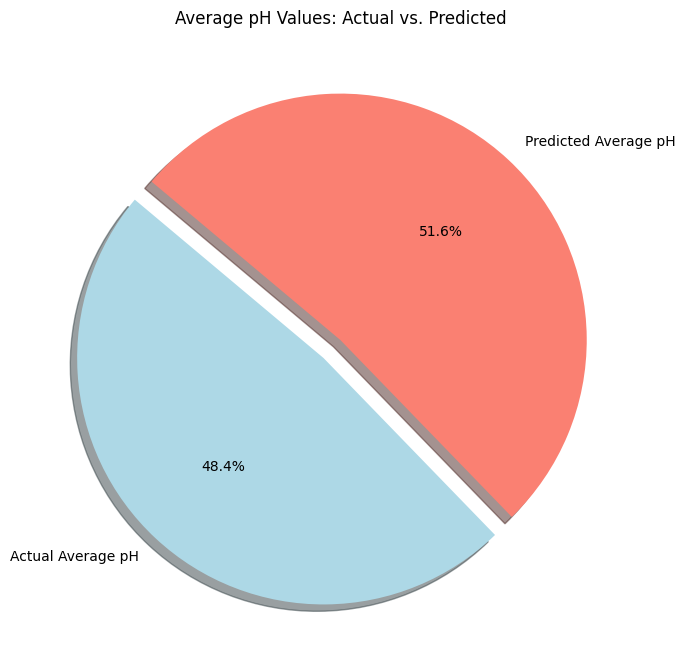

In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv('/content/water_quality.csv')

# Define features and target variable
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'  # Adjust this if needed

# Prepare data
X = df[features]
y = df[target]

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

# Calculate the average values for actual and predicted pH
actual_avg = np.mean(y_test)
predicted_avg = np.mean(y_pred)

# Data for pie chart
labels = ['Actual Average pH', 'Predicted Average pH']
sizes = [actual_avg, predicted_avg]
colors = ['lightblue', 'salmon']
explode = (0.1, 0)  # explode the 1st slice for better visibility

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Average pH Values: Actual vs. Predicted')
plt.show()
